In [1]:
#!pip install dash

In [2]:
# Importation des packages
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import dash
from dash import dcc, html
from dash.dependencies import Input, Output


# **Chargement de donnée**

In [3]:
data = pd.read_csv("vaccination-data.csv")
data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2023-03-21,16482384.0,14444587,42.340,37.106,13730545,35.271,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,1012162.0,2.600
1,Albania,ALB,EURO,REPORTING,2023-03-19,3070468.0,1347054,106.700,47.332,1276432,44.851,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,395384.0,13.893
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-09-26,111316.0,44671,201.670,80.930,42547,77.082,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2023-02-26,156957.0,57904,203.100,76.012,53492,70.221,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,43060.0,56.526


In [4]:
# Dimensions de la base de données
data.shape

(229, 16)

In [5]:
# Lister les variables
data.columns.tolist()

['COUNTRY',
 'ISO3',
 'WHO_REGION',
 'DATA_SOURCE',
 'DATE_UPDATED',
 'TOTAL_VACCINATIONS',
 'PERSONS_VACCINATED_1PLUS_DOSE',
 'TOTAL_VACCINATIONS_PER100',
 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
 'PERSONS_FULLY_VACCINATED',
 'PERSONS_FULLY_VACCINATED_PER100',
 'VACCINES_USED',
 'FIRST_VACCINE_DATE',
 'NUMBER_VACCINES_TYPES_USED',
 'PERSONS_BOOSTER_ADD_DOSE',
 'PERSONS_BOOSTER_ADD_DOSE_PER100']

In [6]:
# Informations sur les variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64  
 7   TOTAL_VACCINATIONS_PER100             227 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

**Statistiques descriptive des variable numérique**

In [7]:
data.describe(exclude=["object"])

,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
count,2.280000e+02,2.290000e+02,227.000000,229.000000,2.290000e+02,229.000000,225.000000,2.100000e+02,210.000000
mean,5.815965e+07,2.411788e+07,153.212744,63.176179,2.220776e+07,58.052572,4.857778,1.149024e+07,32.099524
std,2.808712e+08,1.132883e+08,84.369019,25.847179,1.079874e+08,25.705710,2.854702,5.949226e+07,25.403160
min,1.380000e+02,0.000000e+00,0.301000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000
25%,4.498940e+05,1.919360e+05,83.350000,44.285000,1.777140e+05,38.750000,3.000000,4.518900e+04,8.308500
50%,4.573170e+06,2.740227e+06,154.669000,66.183000,2.321826e+06,62.378000,4.000000,6.373355e+05,29.962000
75%,2.258970e+07,1.072928e+07,216.992000,82.313000,9.157915e+06,77.637000,7.000000,4.196034e+06,53.361500
max,3.465114e+09,1.307512e+09,469.778000,163.185000,1.277357e+09,163.185000,12.000000,8.048508e+08,145.944000


# **Netoyage des données**

In [8]:
# Tableau des valeurs manquantes par colonne
missing_values = data.isnull().sum()


missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_table

,Missing Values,Percentage
COUNTRY,0,0.000000
ISO3,0,0.000000
WHO_REGION,0,0.000000
DATA_SOURCE,0,0.000000
DATE_UPDATED,0,0.000000
TOTAL_VACCINATIONS,1,0.436681
PERSONS_VACCINATED_1PLUS_DOSE,0,0.000000
TOTAL_VACCINATIONS_PER100,2,0.873362
PERSONS_VACCINATED_1PLUS_DOSE_PER100,0,0.000000
PERSONS_FULLY_VACCINATED,0,0.000000


- Visualisation des valeurs manquantes

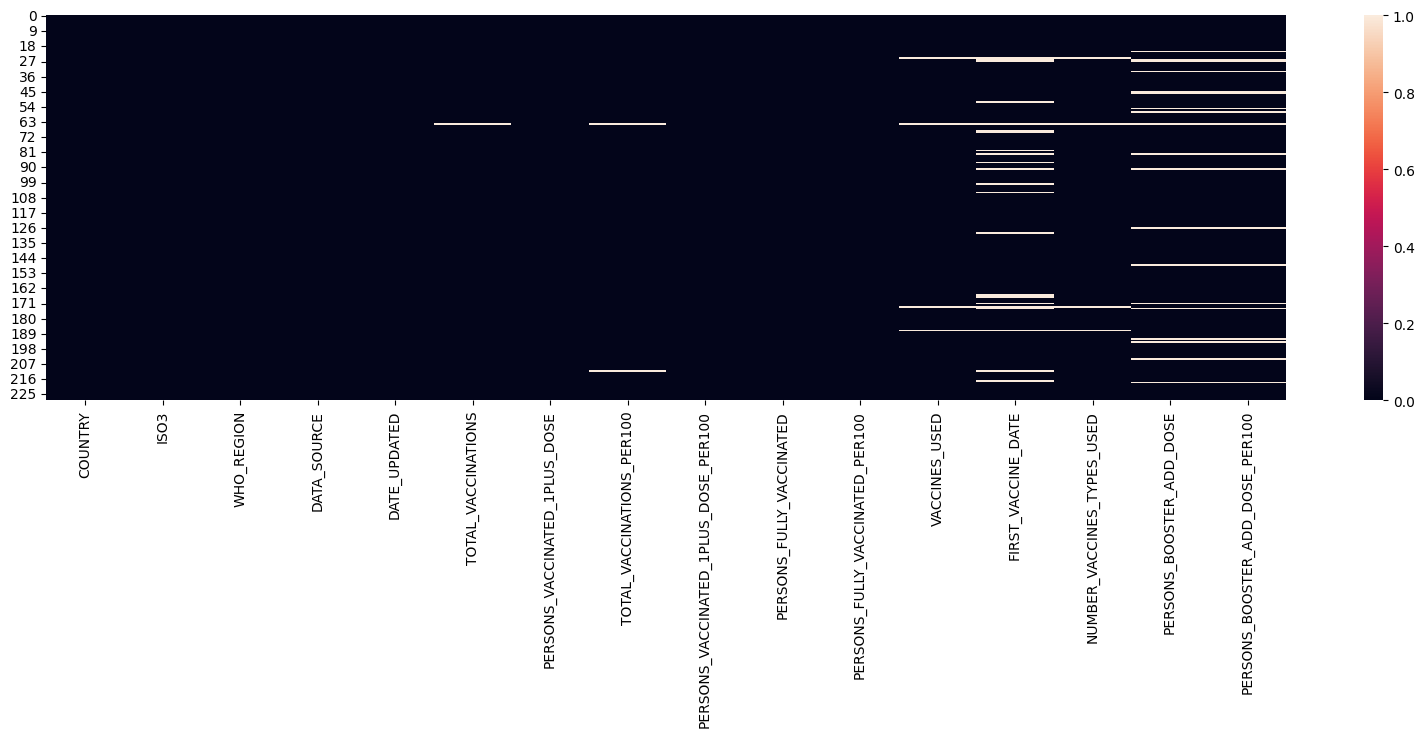

In [9]:

plt.figure(figsize=(20, 5))
sns.heatmap(data.isnull(), cbar=True)
plt.show()

In [10]:
# Suprission des valeurs manquante dans certaines varibles pertinentes
data.dropna(subset= ['TOTAL_VACCINATIONS_PER100','NUMBER_VACCINES_TYPES_USED'], inplace = True)

In [11]:
data['TOTAL_VACCINATIONS'].fillna(0, inplace=True)
data['WHO_REGION'].fillna('Unknown', inplace=True)

<ipython-input-11-2f2fd53e5e44>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TOTAL_VACCINATIONS'].fillna(0, inplace=True)
<ipython-input-11-2f2fd53e5e44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

# **Analyse exploratoire**

In [12]:
# Total Vaccinations par régions
fig = px.bar(data, x="WHO_REGION", y="TOTAL_VACCINATIONS",
             title="Total Vaccinations by WHO Region",
             color="WHO_REGION")

fig.show()



In [13]:
# Couverture Vaccinale Moyenne par Région de l'OMS
def analyze_regional_disparities(data):
    regional_data = data.groupby("WHO_REGION")["PERSONS_FULLY_VACCINATED_PER100"].mean().reset_index()
    regional_data = regional_data.sort_values("PERSONS_FULLY_VACCINATED_PER100", ascending=False)
    print("Couverture Vaccinale Moyenne par Région de l'OMS :\n", regional_data)



    fig = px.bar(
        regional_data,
        x="WHO_REGION",
        y="PERSONS_FULLY_VACCINATED_PER100",
        title="Couverture Vaccinale Moyenne par Région de l'OMS",
        labels={"WHO_REGION": "Région OMS", "PERSONS_FULLY_VACCINATED_PER100": "% Population Vaccinée"},
        color="PERSONS_FULLY_VACCINATED_PER100"
    )
    fig.show()

analyze_regional_disparities(data)


Couverture Vaccinale Moyenne par Région de l'OMS :
   WHO_REGION  PERSONS_FULLY_VACCINATED_PER100
6       WPRO                        77.786686
5      SEARO                        71.643800
4      OTHER                        67.995000
3       EURO                        63.556915
1       AMRO                        60.939400
2       EMRO                        48.936773
0       AFRO                        34.795404


In [14]:
# Distribution des types de vaccins
def analyze_vaccine_usage(data):

    vaccine_data = data["VACCINES_USED"].value_counts().reset_index()
    vaccine_data.columns = ["VACCINES_USED", "Frequency"]
    print("Distribution des Vaccins :\n", vaccine_data)

    # Visualisation
    import plotly.express as px
    fig = px.bar(
        vaccine_data.head(10),
        x="VACCINES_USED",
        y="Frequency",
        title="Distribution des Vaccins Utilisés",
        labels={"VACCINES_USED": "Types de Vaccins", "Frequency": "Fréquence"},
        color="Frequency"
    )
    fig.show()

analyze_vaccine_usage(data)


Distribution des Vaccins :
                                          VACCINES_USED  Frequency
0    AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...         11
1    AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...         10
2    AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...          8
3    AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...          7
4    AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...          7
..                                                 ...        ...
117  AstraZeneca - Vaxzevria,Moderna - Spikevax,SII...          1
118  Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Jan...          1
119  Janssen - Ad26.COV 2-S,Pfizer BioNTech - Comir...          1
120      Beijing CNBG - BBIBP-CorV,Sinovac - CoronaVac          1
121  Beijing CNBG - BBIBP-CorV,Bharat - Covaxin,Gam...          1

[122 rows x 2 columns]


## **Taux de Vaccination par Pays**

In [15]:
# Taux de vaccination par pays

def plot_vaccination_by_country(data):
    # Calcul des taux de vaccination (en pourcentage) pour chaque pays
    country_vaccination = data[['COUNTRY', 'PERSONS_FULLY_VACCINATED_PER100']].dropna()

    # Trier par le taux de vaccination
    country_vaccination = country_vaccination.sort_values(by="PERSONS_FULLY_VACCINATED_PER100", ascending=False)

    fig = px.bar(country_vaccination,
                 x="COUNTRY",
                 y="PERSONS_FULLY_VACCINATED_PER100",
                 title="Taux de Vaccination Complet par Pays",
                 labels={"COUNTRY": "Pays", "PERSONS_FULLY_VACCINATED_PER100": "% Population Vaccinée"},
                 color="PERSONS_FULLY_VACCINATED_PER100",
                 color_continuous_scale="Viridis")
    fig.update_layout(xaxis_tickangle=-90)  # Rotation des étiquettes sur l'axe X
    fig.show()

plot_vaccination_by_country(data)


## **Total des Doses Administrées**

In [16]:
# Total des Doses Administrées par Pays
def plot_total_vaccinations(data):
    # Trier par le taux de doses administrées
    country_vaccinations = data[['COUNTRY', 'TOTAL_VACCINATIONS_PER100']].dropna()
    country_vaccinations = country_vaccinations.sort_values(by="TOTAL_VACCINATIONS_PER100", ascending=False)


    fig = px.bar(country_vaccinations,
                 x="COUNTRY",
                 y="TOTAL_VACCINATIONS_PER100",
                 title="Total des Doses Administrées par Pays",
                 labels={"COUNTRY": "Pays", "TOTAL_VACCINATIONS_PER100": "Total des Doses par 100 Habitants"},
                 color="TOTAL_VACCINATIONS_PER100",
                 color_continuous_scale="Blues")
    fig.update_layout(xaxis_tickangle=-90)  # Rotation des étiquettes sur l'axe X
    fig.show()

plot_total_vaccinations(data)


## **Nombre de Types de Vaccins Utilisés**

In [17]:
# Nombre de Types de Vaccins Utilisés par Pays
def plot_vaccines_used(data):
    # Compter le nombre de types de vaccins utilisés par pays
    data["NUMBER_VACCINES_TYPES_USED"] = data["NUMBER_VACCINES_TYPES_USED"].fillna(0)
    country_vaccines = data[['COUNTRY', 'NUMBER_VACCINES_TYPES_USED']].dropna()

    # Trier par le nombre de types de vaccins utilisés
    country_vaccines = country_vaccines.sort_values(by="NUMBER_VACCINES_TYPES_USED", ascending=False)


    fig = px.bar(country_vaccines,
                 x="COUNTRY",
                 y="NUMBER_VACCINES_TYPES_USED",
                 title="Nombre de Types de Vaccins Utilisés par Pays",
                 labels={"COUNTRY": "Pays", "NUMBER_VACCINES_TYPES_USED": "Nombre de Types de Vaccins"},
                 color="NUMBER_VACCINES_TYPES_USED",
                 color_continuous_scale="Inferno")
    fig.update_layout(xaxis_tickangle=-90)  # Rotation des étiquettes sur l'axe X
    fig.show()

plot_vaccines_used(data)


In [18]:
# Carte mondiale du niveau de vaccinations
fig = px.choropleth(data, locations="ISO3",
                    color="TOTAL_VACCINATIONS",
                    hover_name="COUNTRY",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection= "orthographic"
                    )
fig.show()

# **Creation de dashbord**

In [19]:
# Préparation des données
data['DATE_UPDATED'] = pd.to_datetime(data['DATE_UPDATED'])
data['YEAR'] = data['DATE_UPDATED'].dt.year

In [20]:
# Initialisation de l'application Dash
app = dash.Dash(__name__)

# Définir la mise en page de l'application
app.layout = html.Div([
    html.H1("Tableau de Bord Vaccination COVID-19", style={'textAlign': 'center'}),

    # Filtres
    html.Div([
        html.Div([
            html.Label("Filtrer par région de l'OMS :"),
            dcc.Dropdown(
                id='filter-region',
                options=[{'label': region, 'value': region} for region in sorted(data['WHO_REGION'].unique())],
                value=None,
                multi=False,
                placeholder="Sélectionnez une région"
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.Label("Filtrer par pays :"),
            dcc.Dropdown(
                id='filter-country',
                options=[],
                value=None,
                multi=False,
                placeholder="Sélectionnez un pays"
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),

        html.Div([
            html.Label("Filtrer par année :"),
            dcc.Dropdown(
                id='filter-year',
                options=[{'label': year, 'value': year} for year in sorted(data['YEAR'].unique())],
                value=None,
                multi=False,
                placeholder="Sélectionnez une année"
            ),
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
    ], style={'padding': '20px', 'border': '1px solid #ddd'}),

    # Graphiques interactifs
    html.Div([
        dcc.Graph(id='bar-vaccination-coverage'),
        dcc.Graph(id='choropleth-vaccine-map'),
        dcc.Graph(id='bar-vaccine-types'),
        dcc.Graph(id='bar-total-vaccinations'),
        dcc.Graph(id='bar-vaccination-rate'),
    ]),
])

# Callback pour mettre à jour la liste des pays en fonction de la région sélectionnée
@app.callback(
    Output('filter-country', 'options'),
    Input('filter-region', 'value')
)
def update_country_options(selected_region):
    if selected_region:
        countries = sorted(data[data['WHO_REGION'] == selected_region]['COUNTRY'].unique())
    else:
        countries = sorted(data['COUNTRY'].unique())
    return [{'label': country, 'value': country} for country in countries]

# Callback pour mettre à jour les graphiques en fonction des filtres
@app.callback(
    [Output('bar-vaccination-coverage', 'figure'),
     Output('choropleth-vaccine-map', 'figure'),
     Output('bar-vaccine-types', 'figure'),
     Output('bar-total-vaccinations', 'figure'),
     Output('bar-vaccination-rate', 'figure')],
    [Input('filter-region', 'value'),
     Input('filter-country', 'value'),
     Input('filter-year', 'value')]
)
def update_graphs(selected_region, selected_country, selected_year):
    # Filtrer les données en fonction des sélections
    filtered_data = data

    if selected_region:
        filtered_data = filtered_data[filtered_data['WHO_REGION'] == selected_region]

    if selected_country:
        filtered_data = filtered_data[filtered_data['COUNTRY'] == selected_country]

    if selected_year:
        filtered_data = filtered_data[filtered_data['YEAR'] == selected_year]

    # Graphique 1 : Personnes complètement vaccinées par pays
    bar_vaccination_coverage = px.bar(
        filtered_data.sort_values("PERSONS_FULLY_VACCINATED", ascending=False),
        x="COUNTRY",
        y="PERSONS_FULLY_VACCINATED",
        title="Personnes complètement vaccinées par pays",
        labels={"COUNTRY": "Pays", "PERSONS_FULLY_VACCINATED": "Personnes Vaccinées"},
        color="PERSONS_FULLY_VACCINATED",
        color_continuous_scale="Plasma"
    )
    bar_vaccination_coverage.update_layout(xaxis_tickangle=-90)

    # Graphique 2 : Carte choropleth
    choropleth_vaccine_map = px.choropleth(
        filtered_data,
        locations="ISO3",
        color="TOTAL_VACCINATIONS_PER100",
        hover_name="COUNTRY",
        color_continuous_scale=px.colors.sequential.Viridis,
        title="Carte mondiale des vaccinations (doses administrées pour 100 habitants)"
    )

    # Graphique 3 : Nombre de Types de Vaccins Utilisés
    bar_vaccine_types = px.bar(
        filtered_data.sort_values("NUMBER_VACCINES_TYPES_USED", ascending=False),
        x="COUNTRY",
        y="NUMBER_VACCINES_TYPES_USED",
        title="Nombre de Types de Vaccins Utilisés par Pays",
        labels={"COUNTRY": "Pays", "NUMBER_VACCINES_TYPES_USED": "Types de Vaccins"},
        color="NUMBER_VACCINES_TYPES_USED",
        color_continuous_scale="Inferno"
    )
    bar_vaccine_types.update_layout(xaxis_tickangle=-90)

    # Graphique 4 : Total des Doses Administrées
    bar_total_vaccinations = px.bar(
        filtered_data.sort_values("TOTAL_VACCINATIONS", ascending=False),
        x="COUNTRY",
        y="TOTAL_VACCINATIONS",
        title="Total des Doses Administrées par Pays",
        labels={"COUNTRY": "Pays", "TOTAL_VACCINATIONS": "Total des Doses"},
        color="TOTAL_VACCINATIONS",
        color_continuous_scale="Blues"
    )
    bar_total_vaccinations.update_layout(xaxis_tickangle=-90)

    # Graphique 5 : Taux de Vaccination par Pays
    bar_vaccination_rate = px.bar(
        filtered_data.sort_values("PERSONS_FULLY_VACCINATED_PER100", ascending=False),
        x="COUNTRY",
        y="PERSONS_FULLY_VACCINATED_PER100",
        title="Taux de Vaccination par Pays",
        labels={"COUNTRY": "Pays", "PERSONS_FULLY_VACCINATED_PER100": "% Population Vaccinée"},
        color="PERSONS_FULLY_VACCINATED_PER100",
        color_continuous_scale="Cividis"
    )
    bar_vaccination_rate.update_layout(xaxis_tickangle=-90)

    return bar_vaccination_coverage, choropleth_vaccine_map, bar_vaccine_types, bar_total_vaccinations, bar_vaccination_rate

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>